<h1 style="color:#FBFACD">Tugas Besar II2111 Probabilitas dan Statistik</h1>
<div>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> Nama  : Raden Dizi Assyafadi Putra </p>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> NIM   : 18221155 </p>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> Kelas : K-01 Sistem dan Teknologi Informasi </p>
</div>


<h2 style="color:#B8E8FC">Import Libraries</h2>

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import seaborn as sbs

<h2 style="color:#B8E8FC"> Import Dataset </h2>

In [823]:
df = pd.read_excel("18221155.xlsx")
df

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,2000%,Sama saja,Delivery Makanan,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
1,Pria,20.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,1800%,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN
2,Wanita,52.0,D3,Karyawan Swasta,> Rp 10 juta,Medan,300%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19.0,S1,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,1800%,Ya,Mengerjakan tugas dan mempelajari materi perku...,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Wanita,18.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,Jumlah barang yang diterima kurang,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1900%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
296,Pria,55.0,D3,BUMN,> Rp 10 juta,Bandung,800%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
297,Pria,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,600%,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
298,Pria,56.0,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Medan,300%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN


In [603]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: float64(3), object(147)
memory usage: 351.7+ KB


<h2 style="color:#B8E8FC"> Nomor 1 </h2>
<p>Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.</p>

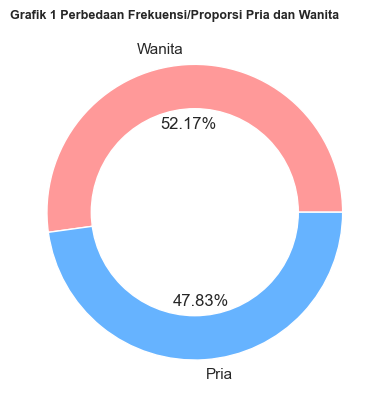

In [604]:
# Generate Dataframe
gender_freq = pd.DataFrame(df["Jenis Kelamin"].value_counts())

label = df["Jenis Kelamin"].unique()
label = label[~pd.isnull(label)]
# Plotting Dataframe
plt.pie(gender_freq.values.flatten(), labels=label, autopct='%.2f%%',colors=['#ff9999','#66b3ff'])

## Change Pie Chart to Donut Chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Grafik 1 Perbedaan Frekuensi/Proporsi Pria dan Wanita", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 2 </h2>
<p> Buat tabel frekuensi dan proporsi untuk jenis kelamin responden</p>

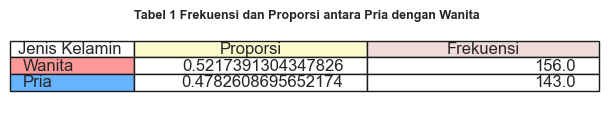

In [605]:
# Generate Dataframe
gender_prop = pd.DataFrame(df["Jenis Kelamin"].value_counts(normalize=True))

# Rename DataFrame
gender_prop.rename(columns={"Jenis Kelamin":"Proporsi"}, inplace=True)
gender_freq.rename(columns={"Jenis Kelamin":"Frekuensi"}, inplace=True)
# Merge Dataframe
gender_data = gender_prop.merge(gender_freq, left_index=True, right_index=True)
gender_data.rename_axis("Jenis Kelamin",inplace=True)

# Plotting Dataframe
fig, ax = plt.subplots(figsize=(6, 1))
ax.axis('off')
ax.axis('tight')
ax.grid(False)

## Style Table with Matplotlib
table = ax.table(cellText=gender_data.values,
rowLabels=gender_data.index,
colLabels=gender_data.columns, 
rowColours=["#ff9999","#66b3ff"],
colColours=["#FBFACD","#F0DBDB"],
loc='center')
w, h = table[0,1].get_width(), table[0,1].get_height()
table.add_cell(0, -1, w,h, text=gender_data.index.name)
plt.title("Tabel 1 Frekuensi dan Proporsi antara Pria dengan Wanita", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 3 </h2>
<p> Buat histogram untuk data umur responden.</p>

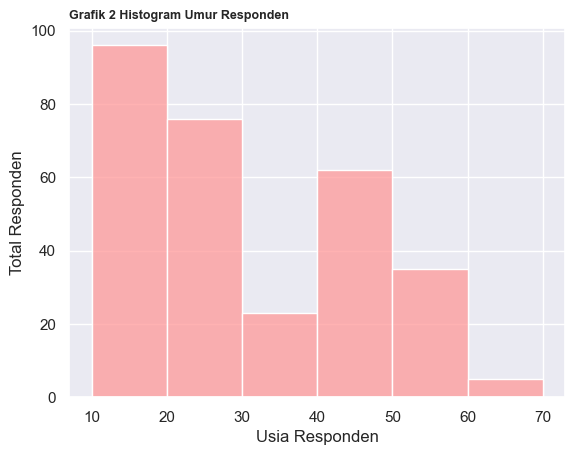

In [606]:
sbs.set(color_codes=True)
sbs.set(style="darkgrid", palette="muted")

histogram = sbs.histplot(data=df, x="Usia", bins=[10,20,30,40,50,60,70],color="#ff9999")
histogram.set(xlabel='Usia Responden', ylabel='Total Responden')
plt.title("Grafik 2 Histogram Umur Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

### Data Cleaning for Usia Column

In [607]:
# Data Cleaning
cleandf = df.dropna(subset=["Usia"])
cleandf = cleandf[cleandf["Usia"] < 100]

<h2 style="color:#B8E8FC"> Nomor 4 </h2>
<p> Buat boxplot untuk data umur responden.</p>

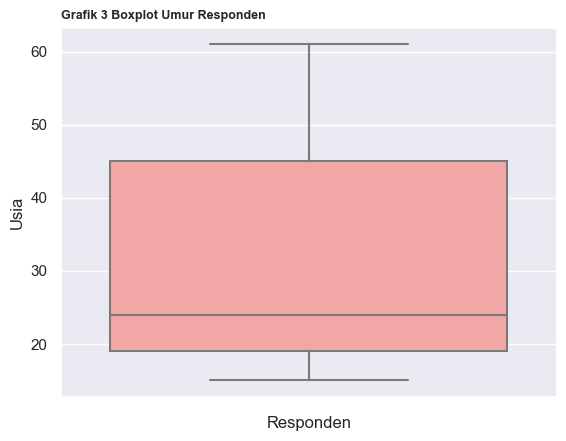

In [608]:
# Generate Plot
boxplot = sbs.boxplot(y=cleandf["Usia"],orient="v",color="#ff9999")
boxplot.set(xlabel='Responden', ylabel='Usia')
plt.title("Grafik 3 Boxplot Umur Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()


<h2 style="color:#B8E8FC"> Nomor 5 </h2>
<p> Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.</p>


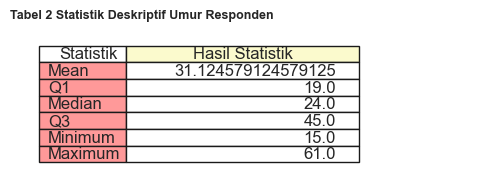

In [609]:
# Mean
mean_age = np.mean(cleandf["Usia"])

# Minimum
minimum = cleandf["Usia"].min()

# Maximum
maximum = cleandf["Usia"].max()

#  Quartile 1
q1 = np.percentile(cleandf["Usia"],25)

# Median / Q2
q2 = np.median(cleandf["Usia"])

# Quartile 3
q3 = np.percentile(cleandf["Usia"],75)

# Generate Dataframe
statsdata = pd.DataFrame([mean_age,q1,q2,q3,minimum,maximum],index=["Mean","Q1","Median","Q3","Minimum","Maximum"],columns=["Hasil Statistik"])
statsdata.rename_axis("Statistik",inplace=True)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.axis('tight')

## Style Table with Matplotlib
table = ax.table(
    cellText=statsdata.values,
rowLabels=statsdata.index,
colLabels=statsdata.columns,
colWidths=[0.5,0.5],
rowColours=["#ff9999","#ff9999","#ff9999","#ff9999","#ff9999","#ff9999"],
colColours=["#FBFACD"],
loc='center')
w, h = table[0,0].get_width(), table[0,0].get_height()
table.add_cell(0, -1, w,h, text=statsdata.index.name)

plt.title("Tabel 2 Statistik Deskriptif Umur Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 6 </h2>
<p> Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR
atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)</p>

In [610]:
IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

outliers = df[(df["Usia"] < lower_bound) | (df["Usia"] > upper_bound) | (df["Usia"].isnull())]
print("Jumlah Outlier: ",len(outliers))
outliers

Jumlah Outlier:  3


,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
182,Wanita,14021976.0,S1,Ibu Rumah Tangga,NaN,Depok,NaN,Ya,Berbelanja online,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
263,Pria,NaN,S2,Karyawan Swasta,> Rp 10 juta,Jakarta,600%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bandung,1800%,Ya,Berbelanja online,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN


<p> Dengan asumsi bahwa data tidak di-clean terlebih dahulu sebelum pemrosesan, maka ada TIGA Outlier yang terdapat pada dataset </p>

<h2 style="color:#B8E8FC"> Nomor 7 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi profesi responden.</p>

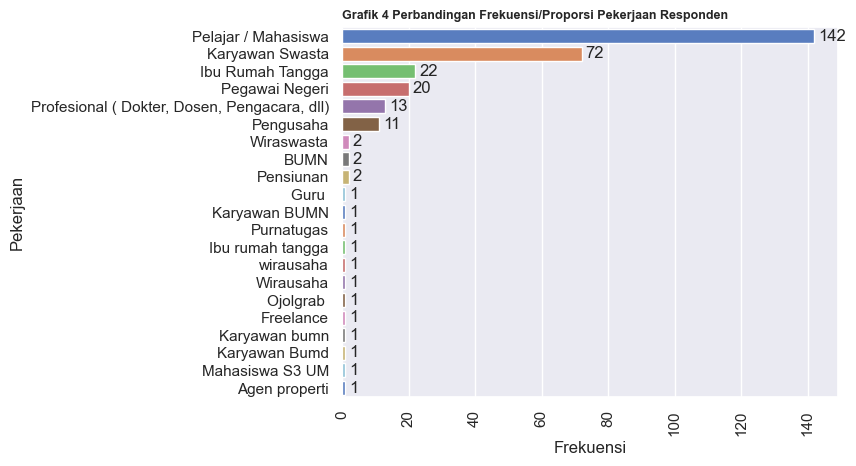

In [747]:
profession_freq = pd.DataFrame(df["Pekerjaan"].value_counts())
profession_freq.rename(columns={"Pekerjaan":"Frekuensi"}, inplace=True)
profession_freq.rename_axis("Pekerjaan",inplace=True)

graph = sbs.barplot(y=profession_freq.index, x=profession_freq["Frekuensi"], orient='h', palette="muted")
graph.bar_label(graph.containers[0], padding=3)
plt.xticks(rotation=90)
plt.title("Grafik 4 Perbandingan Frekuensi/Proporsi Pekerjaan Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 8 </h2>
<p> Buat tabel frekuensi dan proporsi untuk profesi responden</p>

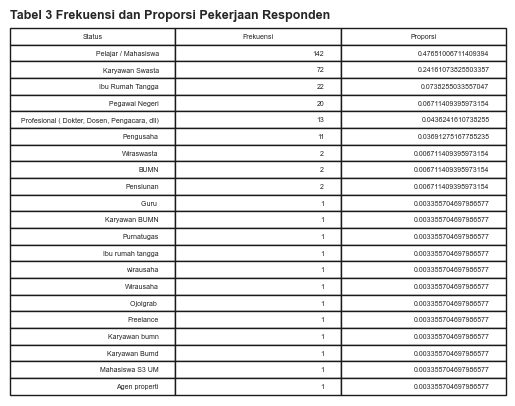

In [612]:
profession_prop = pd.DataFrame(df["Pekerjaan"].value_counts(normalize=True))
profession_prop.rename(columns={"Pekerjaan":"Proporsi"}, inplace=True)

d = {
    "Status": profession_freq.index,
    "Frekuensi": profession_freq["Frekuensi"],
    "Proporsi": profession_prop["Proporsi"]
}
profession_data = pd.DataFrame(d)

table = plt.table(cellText=profession_data.values,
colLabels=profession_data.columns,
loc='center')
plt.axis('off')
plt.title("Tabel 3 Frekuensi dan Proporsi Pekerjaan Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 9 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan
terakhir.</p>


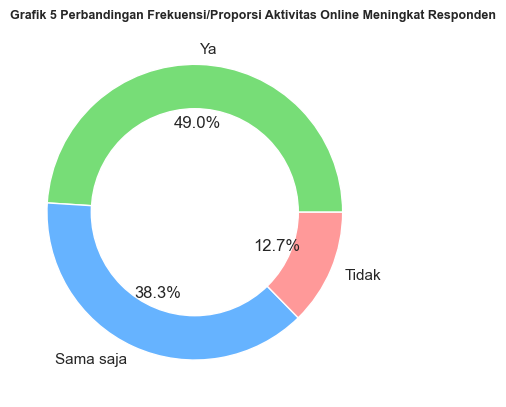

In [613]:
activity_freq = pd.DataFrame(df['Aktivitas Online Meningkat'].value_counts())
activity_freq.rename(columns={"Aktivitas Online Meningkat":"Frekuensi"}, inplace=True)
activity_freq.rename_axis("Aktivitas Online Meningkat",axis="columns" ,inplace=True)

label = activity_freq.index
sizes = activity_freq["Frekuensi"]
colors = ['#77DD77','#66b3ff','#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=label, colors=colors, autopct='%1.1f%%')

## Change Pie Chart to Donut Chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.title("Grafik 5 Perbandingan Frekuensi/Proporsi Aktivitas Online Meningkat Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 10 </h2>
<p> Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat
atau tidak dalam 3 bulan terakhir.</p>



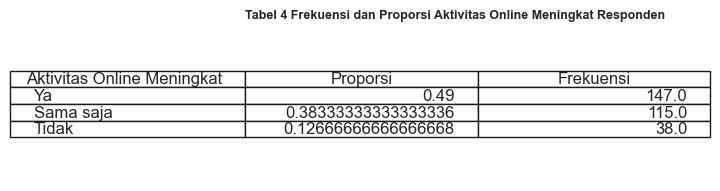

In [614]:
activity_prop = pd.DataFrame(df['Aktivitas Online Meningkat'].value_counts(normalize=True))
activity_prop.rename(columns={"Aktivitas Online Meningkat":"Proporsi"}, inplace=True)
activity_prop.rename_axis("Aktivitas Online Meningkat",axis="columns" ,inplace=True)

activity_data = activity_prop.merge(activity_freq, left_index=True, right_index=True)
activity_data.rename_axis("Aktivitas Online Meningkat",inplace=True)

fig, ax = plt.subplots(figsize=(6, 2))
plt.axis('off')
plt.axis('tight')

table = ax.table(cellText=activity_data.values,
rowLabels=activity_data.index,
colLabels=activity_data.columns,
loc='center')
w, h = table[0,0].get_width(), table[0,0].get_height()
table.add_cell(0, -1, w,h, text=activity_data.index.name)

plt.title("Tabel 4 Frekuensi dan Proporsi Aktivitas Online Meningkat Responden", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 11 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di
kolom bank_1 sampai bank_7</p>



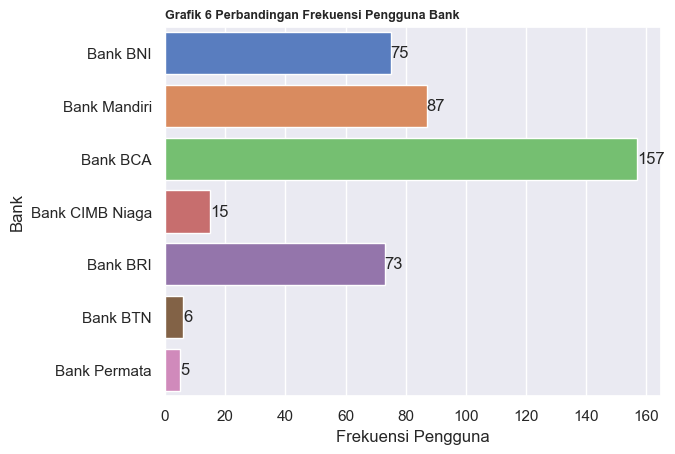

In [746]:
# Generate Dataframe
bank_1 = pd.DataFrame(df["bank_1"].value_counts())
bank_2 = pd.DataFrame(df["bank_2"].value_counts())
bank_3 = pd.DataFrame(df["bank_3"].value_counts())
bank_4 = pd.DataFrame(df["bank_4"].value_counts())
bank_5 = pd.DataFrame(df["bank_5"].value_counts())
bank_6 = pd.DataFrame(df["bank_6"].value_counts())
bank_7 = pd.DataFrame(df["bank_7"].value_counts())

bank_val = np.array([bank_1.index[0],bank_2.index[0],bank_3.index[0],bank_4.index[0],bank_5.index[0],bank_6.index[0],bank_7.index[0]])
bank_freq = np.array([bank_1["bank_1"][0],bank_2["bank_2"][0],bank_3["bank_3"][0],bank_4["bank_4"][0],bank_5["bank_5"][0],bank_6["bank_6"][0],bank_7["bank_7"][0]])
bank_data = {'Bank' : bank_val, "Frekuensi Pengguna" : bank_freq}
df_bank = pd.DataFrame(data=bank_data)

graph = sbs.barplot(y=df_bank['Bank'], x=df_bank["Frekuensi Pengguna"], orient="h",  palette="muted")
graph.bar_label(graph.containers[0])
plt.title("Grafik 6 Perbandingan Frekuensi Pengguna Bank", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 12 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai
bank_7.</p>

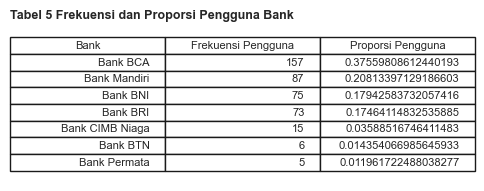

In [616]:
total = df_bank["Frekuensi Pengguna"].sum()

bank_prop = np.array([df_bank["Frekuensi Pengguna"][0]/total,df_bank["Frekuensi Pengguna"][1]/total,df_bank["Frekuensi Pengguna"][2]/total,df_bank["Frekuensi Pengguna"][3]/total,df_bank["Frekuensi Pengguna"][4]/total,df_bank["Frekuensi Pengguna"][5]/total,df_bank["Frekuensi Pengguna"][6]/total])
datbank = {'Bank' : bank_val,"Frekuensi Pengguna": bank_freq, "Proporsi Pengguna" : bank_prop}
datbank = pd.DataFrame(data=datbank).sort_values(by="Proporsi Pengguna", ascending=False)
fig, ax = plt.subplots(figsize=(6, 2))
ax.table(cellText=datbank.values,
colLabels=datbank.columns,
loc='center')
plt.axis('off')

plt.title("Tabel 5 Frekuensi dan Proporsi Pengguna Bank", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 13 </h2>
<p> Hitung confidence interval 95% untuk proporsi pengguna Bank BCA:
... < Pbca <... </p>

In [617]:
bca_data = df_bank[df_bank["Bank"] == "Bank BCA"]["Frekuensi Pengguna"].sum()
total_bank = df_bank["Frekuensi Pengguna"].sum()
prop_bca = bca_data/total_bank

alpha = 0.05
z_alphaper2 = st.norm.ppf(1-alpha/2)

lower_bound = prop_bca - z_alphaper2*np.sqrt(prop_bca*(1-prop_bca)/total_bank)
upper_bound = prop_bca + z_alphaper2*np.sqrt(prop_bca*(1-prop_bca)/total_bank)

print("Confidence Interval dari Bank BCA adalah {:.4f} < Proporsi Bank BCA < {:.4f}".format(lower_bound, upper_bound))

Confidence Interval dari Bank BCA adalah 0.3292 < Proporsi Bank BCA < 0.4220


<h2 style="color:#B8E8FC"> Nomor 14 </h2>
<p> Lakukan uji hipotesis berikut:</p>
<p>H0: pbca = 0.5</p>
<p>H1: pbca ≠ 0.5</p>
<p>alpha = 5%</p>

In [618]:
pBCA0 = 0.5
z =(total_bank*prop_bca - total_bank*pBCA0)/np.sqrt(total_bank*pBCA0*(1-pBCA0))
z_alphaper2 = st.norm.ppf(1-alpha/2)

print("Critical Region: Z < -{:.2f} | Z > {:.2f}".format(z_alphaper2,z_alphaper2))
print("Z-value: {:.4f}".format(z))

if not(z < -z_alphaper2 or z > z_alphaper2):
    print("Karena Z-value berada di luar Critical Region, maka hipotesis gagal ditolak")
else:
    print("Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak")

pvalue = 2*(1-st.norm.cdf(abs(z)))
print ("P value : {:.8f}".format(pvalue))

Critical Region: Z < -1.96 | Z > 1.96
Z-value: -5.0868
Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak
P value : 0.00000036


<h2 style="color:#B8E8FC"> Nomor 15 </h2>
<p> Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi
channel yang dipilih responden untuk melakukan “Transfer antar bank”.</p>

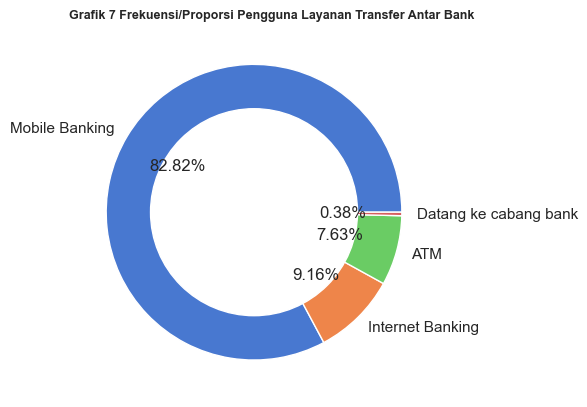

In [619]:
df_transfer = df["19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]"]
trans_freq = pd.DataFrame(df_transfer.value_counts())
trans_freq.rename(columns={"19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]":"Frekuensi"},inplace=True)
trans_freq.rename_axis("Transfer Antar Bank",inplace=True)

plt.pie(trans_freq["Frekuensi"], labels=trans_freq.index, autopct='%.2f%%')

my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Grafik 7 Frekuensi/Proporsi Pengguna Layanan Transfer Antar Bank", fontsize=9, loc="left", fontweight="bold")
plt.show()


<h2 style="color:#B8E8FC"> Nomor 16 </h2>
<p> Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden
untuk melakukan “Transfer antar bank”.</p>

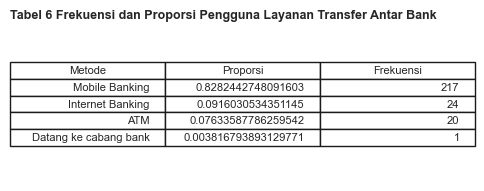

In [620]:
trans_prop = pd.DataFrame(df_transfer.value_counts(normalize=True))
d = {
    "Metode": trans_prop.index,
    "Proporsi": trans_prop.values[:,0],
    "Frekuensi": trans_freq.values[:,0],
}
trans_data = pd.DataFrame(data =d)
trans_data.rename(columns={"19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]":"Proporsi"},inplace=True)
# Plotting Dataframe
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.axis('tight')

## Style Table with Matplotlib
table = ax.table(cellText=trans_data.values,
colLabels=trans_data.columns, 
loc='center')
plt.title("Tabel 6 Frekuensi dan Proporsi Pengguna Layanan Transfer Antar Bank", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 17 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di
kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)</p>

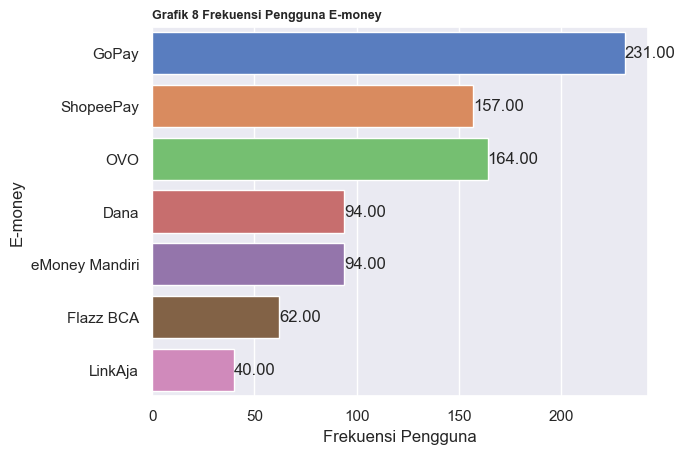

In [745]:
emoney_1 = pd.DataFrame(df["emoney_pilihan_1"].value_counts())
emoney_2 = pd.DataFrame(df["emoney_pilihan_2"].value_counts())
emoney_3 = pd.DataFrame(df["emoney_pilihan_3"].value_counts())
emoney_4 = pd.DataFrame(df["emoney_pilihan_4"].value_counts())
emoney_5 = pd.DataFrame(df["emoney_pilihan_5"].value_counts())
emoney_6 = pd.DataFrame(df["emoney_pilihan_6"].value_counts())
emoney_7 = pd.DataFrame(df["emoney_pilihan_7"].value_counts())

emoney_val = np.array([emoney_1.index[0],emoney_2.index[0],emoney_3.index[0],emoney_4.index[0],emoney_5.index[0],emoney_6.index[0],emoney_7.index[0]])
emoney_freq = np.array([emoney_1["emoney_pilihan_1"][0],emoney_2["emoney_pilihan_2"][0],emoney_3["emoney_pilihan_3"][0],emoney_4["emoney_pilihan_4"][0],emoney_5["emoney_pilihan_5"][0],emoney_6["emoney_pilihan_6"][0],emoney_7["emoney_pilihan_7"][0]])
emoney_data = {'E-money' : emoney_val, "Frekuensi Pengguna" : emoney_freq}
df_emoney = pd.DataFrame(data=emoney_data)

graph = sbs.barplot(y=df_emoney['E-money'], x=df_emoney["Frekuensi Pengguna"], orient="h",  palette="muted")
graph.bar_label(graph.containers[0], fmt='%.2f', label_type='edge')
plt.title("Grafik 8 Frekuensi Pengguna E-money", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 18 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom
emoney_pilihan_1 sampai emoney_pilihan_7</p>

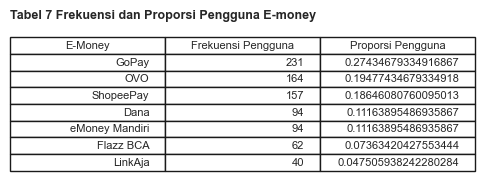

In [624]:
total = df_emoney["Frekuensi Pengguna"].sum()

emoney_prop = np.array([df_emoney["Frekuensi Pengguna"][0]/total,df_emoney["Frekuensi Pengguna"][1]/total,df_emoney["Frekuensi Pengguna"][2]/total,df_emoney["Frekuensi Pengguna"][3]/total,df_emoney["Frekuensi Pengguna"][4]/total,df_emoney["Frekuensi Pengguna"][5]/total,df_emoney["Frekuensi Pengguna"][6]/total])
datemoney = {'E-Money' : emoney_val,"Frekuensi Pengguna": emoney_freq, "Proporsi Pengguna" : emoney_prop}
datemoney  = pd.DataFrame(data=datemoney).sort_values(by="Proporsi Pengguna", ascending=False)
fig, ax = plt.subplots(figsize=(6, 2))
ax.table(cellText=datemoney.values,
colLabels=datemoney.columns,
loc='center')
plt.axis('off')

plt.title("Tabel 7 Frekuensi dan Proporsi Pengguna E-money", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 19 </h2>
<p> Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.
... < PGopay -POvo < ... </p>

In [669]:
alpha = 0.05
total_emoney = df_emoney["Frekuensi Pengguna"].sum()
gopay_prop = df_emoney[df_emoney["E-money"] == "GoPay"]["Frekuensi Pengguna"].sum()/total_emoney
ovo_prop = df_emoney[df_emoney["E-money"] == "OVO"]["Frekuensi Pengguna"].sum()/total_emoney
difference = gopay_prop - ovo_prop
z_alphaPer2 = st.norm.ppf(1-alpha/2)
lower_bound = difference - z_alphaPer2 * np.sqrt(gopay_prop*(1-gopay_prop)/total_emoney + ovo_prop*(1-ovo_prop)/total_emoney)
upper_bound = difference + z_alphaPer2 * np.sqrt(gopay_prop*(1-gopay_prop)/total_emoney + ovo_prop*(1-ovo_prop)/total_emoney)
print ("Confidence Interval Selisih Proporsi penggunaan Gopay dan OVO:")
print("{:.5f} < P Gopay - P OVO  < {:.5f}".format(lower_bound,upper_bound))

Confidence Interval Selisih Proporsi penggunaan Gopay dan OVO:
0.03928 < P Gopay - P OVO  < 0.11987


<h2 style="color:#B8E8FC"> Nomor 20 </h2>
<p> Lakukan uji hipotesis berikut:</p>
<p>H0: PGopay = POvo</p>
<p>H1: PGopay ≠ POvo</p>
<p>alpha = 5%</p>

In [675]:
XGopay = df_emoney[df_emoney["E-money"] == "GoPay"]["Frekuensi Pengguna"].sum()
XOVO = df_emoney[df_emoney["E-money"] == "OVO"]["Frekuensi Pengguna"].sum()

pHat = (XGopay + XOVO) / (total_emoney + total_emoney)
z_alphaper2 = st.norm.ppf(1-alpha/2)
z = (gopay_prop - ovo_prop) / np.sqrt(pHat*(1-pHat)*(1/total_emoney + 1/total_emoney))

print("Critical Region: Z < -{:.2f} | Z > {:.2f}".format(z_alphaper2,z_alphaper2))
print("Z-value: {:.4f}".format(z))

if not(z < -z_alphaper2 or z > z_alphaper2):
    print("Karena Z-value berada di luar Critical Region, maka hipotesis gagal ditolak")
else:
    print("Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak")

pvalue = 2*(1-st.norm.cdf(abs(z)))
print ("P value : {:.5f}".format(pvalue))

Critical Region: Z < -1.96 | Z > 1.96
Z-value: 3.8532
Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak
P value : 0.00012


<h2 style="color:#B8E8FC"> Nomor 21 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk nominal yang biasa dipakai untuk top up emoney.</p>

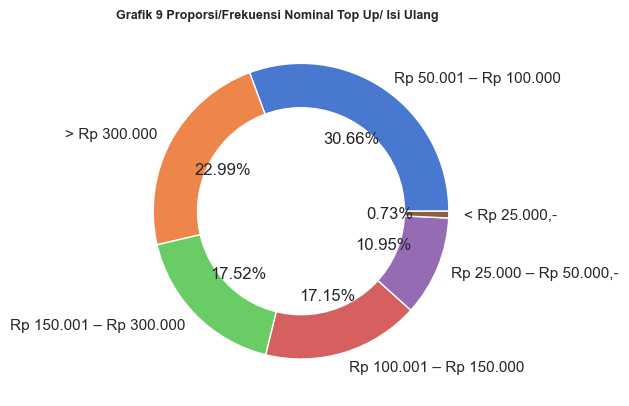

In [739]:
df_nominal = pd.DataFrame(df["39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?"].value_counts())
df_nominal.rename(columns={"39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?":"Frekuensi"}, inplace=True)
df_nominal["Proporsi"] = df_nominal["Frekuensi"]/df_nominal["Frekuensi"].sum()

plt.pie(df_nominal["Frekuensi"], labels=df_nominal.index, autopct='%.2f%%')

my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Grafik 9 Proporsi/Frekuensi Nominal Top Up/ Isi Ulang", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 22 </h2>
<p> Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up
emoney.</p>

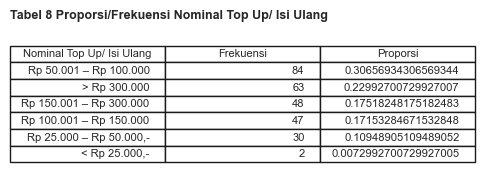

In [740]:

d = {
    "Nominal Top Up/ Isi Ulang" : df_nominal.index,
    "Frekuensi" : df_nominal["Frekuensi"].values,
    "Proporsi" : df_nominal["Proporsi"].values
}
new_nom = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(6, 2))
ax.table(cellText=new_nom.values,
colLabels=new_nom.columns,
loc='center')
plt.axis('off')

plt.title("Tabel 8 Proporsi/Frekuensi Nominal Top Up/ Isi Ulang", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 23 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada
di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)</p>

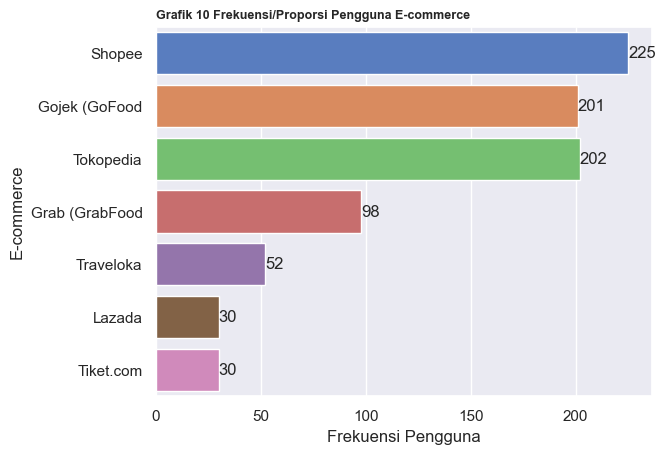

In [749]:
ecommerce_1 = pd.DataFrame(df["ecommerce_pilihan_1"].value_counts())
ecommerce_2 = pd.DataFrame(df["ecommerce_pilihan_2"].value_counts())
ecommerce_3 = pd.DataFrame(df["ecommerce_pilihan_3"].value_counts())
ecommerce_4 = pd.DataFrame(df["ecommerce_pilihan_4"].value_counts())
ecommerce_5 = pd.DataFrame(df["ecommerce_pilihan_5"].value_counts())
ecommerce_6 = pd.DataFrame(df["ecommerce_pilihan_6"].value_counts())
ecommerce_7 = pd.DataFrame(df["ecommerce_pilihan_7"].value_counts())

ecommerce_val = np.array([ecommerce_1.index[0],ecommerce_2.index[0],ecommerce_3.index[0],ecommerce_4.index[0],ecommerce_5.index[0],ecommerce_6.index[0],ecommerce_7.index[0]])
ecommerce_freq = np.array([ecommerce_1["ecommerce_pilihan_1"][0],ecommerce_2["ecommerce_pilihan_2"][0],ecommerce_3["ecommerce_pilihan_3"][0],ecommerce_4["ecommerce_pilihan_4"][0],ecommerce_5["ecommerce_pilihan_5"][0],ecommerce_6["ecommerce_pilihan_6"][0],ecommerce_7["ecommerce_pilihan_7"][0]])
ecommerce_prop = ecommerce_freq/ecommerce_freq.sum()
ecommerce_data = {'E-commerce' : ecommerce_val, "Frekuensi Pengguna" : ecommerce_freq, "Proporsi Pengguna" : ecommerce_prop}
df_ecommerce = pd.DataFrame(data=ecommerce_data)

graph = sbs.barplot(y=df_ecommerce['E-commerce'], x=df_ecommerce["Frekuensi Pengguna"], orient="h",  palette="muted")
graph.bar_label(graph.containers[0], label_type='edge')
plt.title("Grafik 10 Frekuensi/Proporsi Pengguna E-commerce", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 24 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom
ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)</p>

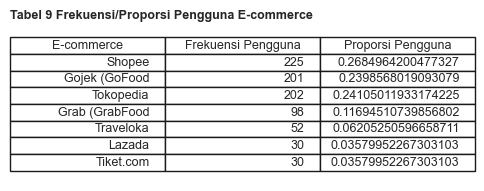

In [752]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.axis('off')

ax.table(cellText=df_ecommerce.values,
colLabels=df_ecommerce.columns,
loc='center')

plt.title("Tabel 9 Frekuensi/Proporsi Pengguna E-commerce", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 25 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk responden yang prefer beli handphone secara offline vs online</p>


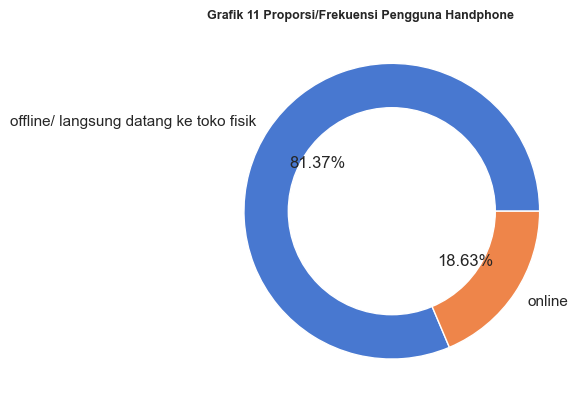

In [759]:
df_phone = df["47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]"]
phone_freq = pd.DataFrame(df_phone.value_counts())
phone_freq.rename(columns={"47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]":"Frekuensi pengguna"},inplace=True)
phone_freq.rename_axis("Transfer Antar Bank",axis="columns",inplace=True)
phone_freq["Proporsi pengguna"] = phone_freq["Frekuensi pengguna"]/phone_freq["Frekuensi pengguna"].sum()

plt.pie(phone_freq["Frekuensi pengguna"], labels=phone_freq.index, autopct='%.2f%%')
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Grafik 11 Proporsi/Frekuensi Pengguna Handphone", fontsize=9, loc="left", fontweight="bold")
plt.show()


<h2 style="color:#B8E8FC"> Nomor 26 </h2>
<p> Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara
offline vs online </p>


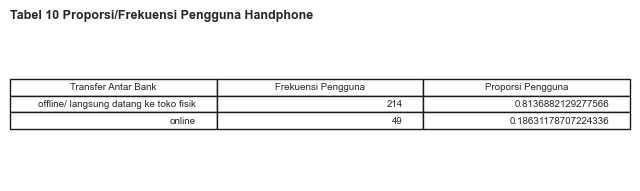

In [770]:
d = {
    "Transfer Antar Bank" : phone_freq.index,
    "Frekuensi Pengguna" : phone_freq["Frekuensi pengguna"].values,
    "Proporsi Pengguna" : phone_freq["Proporsi pengguna"].values
}
new_phone = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(8, 2))
plt.axis('off')

ax.table(cellText=new_phone.values,
colLabels=new_phone.columns,
loc='center')

plt.title("Tabel 10 Proporsi/Frekuensi Pengguna Handphone", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 27 </h2>
<p>Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk tempat beli makanan online yang pilihan responden</p>



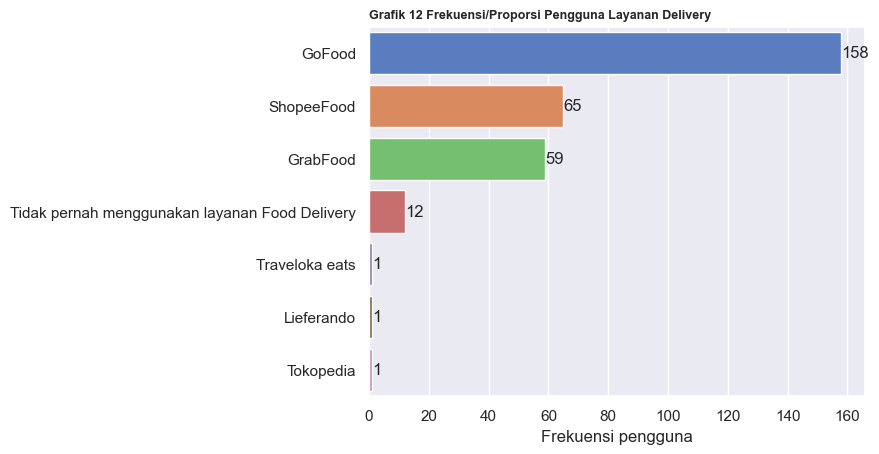

In [765]:
sopifud = df["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"]
df_deliveryservice = pd.DataFrame(sopifud.value_counts())
df_deliveryservice.rename(columns={"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?":"Frekuensi pengguna"},inplace=True)
df_deliveryservice.rename_axis("Layanan Delivery",axis="columns",inplace=True)
df_deliveryservice["Proporsi pengguna"] = df_deliveryservice["Frekuensi pengguna"]/df_deliveryservice["Frekuensi pengguna"].sum()

graph = sbs.barplot(y=df_deliveryservice.index, x=df_deliveryservice["Frekuensi pengguna"], orient="h",  palette="muted")
graph.bar_label(graph.containers[0], label_type='edge')
plt.title("Grafik 12 Frekuensi/Proporsi Pengguna Layanan Delivery", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 28 </h2>
<p>Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan
responden</p>



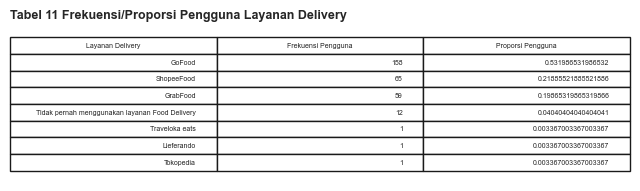

In [821]:
d = {
    "Layanan Delivery" : df_deliveryservice.index,
    "Frekuensi Pengguna" : df_deliveryservice["Frekuensi pengguna"].values,
    "Proporsi Pengguna" : df_deliveryservice["Proporsi pengguna"].values
}
new_delivery = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(8, 2))

plt.axis('off')

ax.table(cellText=new_delivery.values,
colLabels=new_delivery.columns,
loc='center')

plt.title("Tabel 11 Frekuensi/Proporsi Pengguna Layanan Delivery", fontsize=9, loc="left", fontweight="bold")
plt.show()

<h2 style="color:#B8E8FC"> Nomor 29 </h2>
<p> Lakukan One Way ANOVA Test berikut:</p>
<p>H0: Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood</p>
<p>H1: Setidaknya ada dua grup yang memiliki mean umur yang berbeda</p>
<p>Alpha: 5%</p>






In [824]:
data29 = df.iloc[:,[1,128]]
data29 = data29.loc[data29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"].isin(["GoFood","GrabFood","ShopeeFood"])]
data29 = data29.sort_values(["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"],ascending= [1])

gofood = data29.loc[data29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"] == 'GoFood']
xbar_gofood = np.mean(gofood['Usia'])

grabfood = data29.loc[data29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"] == 'GrabFood']
xbar_grabfood = np.mean(grabfood['Usia'])

shopeefood = data29.loc[data29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"] == 'ShopeeFood']
xbar_shopeefood = np.mean(shopeefood['Usia'])

xbar_all = np.mean(data29['Usia'])

xbar_gofood = [xbar_gofood for i in range (len(gofood))]
xbar_gofood = pd.DataFrame(xbar_gofood)
xbar_gofood.columns = ['Xbar']

xbar_grabfood = [xbar_grabfood for i in range (len(grabfood))]
xbar_grabfood = pd.DataFrame(xbar_grabfood)
xbar_grabfood.columns = ['Xbar']

xbar_shopeefood = [xbar_shopeefood for i in range (len(shopeefood))]
xbar_shopeefood = pd.DataFrame(xbar_shopeefood)
xbar_shopeefood.columns = ['Xbar']

xbar_all = [xbar_all for i in range (len(data29))]
xbar_all = pd.DataFrame(xbar_all)
xbar_all.columns = ['Xbar All']

xbar_group = [xbar_gofood,xbar_grabfood,xbar_shopeefood]
xbar_group = pd.concat(xbar_group,axis=0)
xbar_group.columns = ['Xbar Per Group']

xbar_group.reset_index(inplace=True, drop=True)
data29.reset_index(inplace=True, drop=True)
data29 = pd.concat([data29,xbar_group,xbar_all], axis= 1)

selisih_group = []
selisih_all = []
for i in range (len(data29)):
    selisih_group.append((data29.iloc[:,0][i]-data29.iloc[:,2][i])**2)
    selisih_all.append((data29.iloc[:,0][i]-data29.iloc[:,3][i])**2)

selisih_group = pd.DataFrame(selisih_group)
selisih_group.columns = ["(X-Xbar per group)^2"]
selisih_all = pd.DataFrame(selisih_all)
selisih_all.columns = ["(X-Xbar All)^2"]

data29 = pd.concat([data29, selisih_group, selisih_all], axis=1)
data29


,Usia,"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?",Xbar Per Group,Xbar All,(X-Xbar per group)^2,(X-Xbar All)^2
0,51.0,GoFood,89344.00000,50109.117857,7.973240e+09,2.505815e+09
1,48.0,GoFood,89344.00000,50109.117857,7.973776e+09,2.506116e+09
2,19.0,GoFood,89344.00000,50109.117857,7.978956e+09,2.509020e+09
3,41.0,GoFood,89344.00000,50109.117857,7.975026e+09,2.506816e+09
4,19.0,GoFood,89344.00000,50109.117857,7.978956e+09,2.509020e+09
...,...,...,...,...,...,...
277,22.0,ShopeeFood,24.09375,50109.117857,4.383789e+00,2.508719e+09
278,47.0,ShopeeFood,24.09375,50109.117857,5.246963e+02,2.506216e+09
279,48.0,ShopeeFood,24.09375,50109.117857,5.715088e+02,2.506116e+09
280,19.0,ShopeeFood,24.09375,50109.117857,2.594629e+01,2.509020e+09
